# Добыча золота

## Оглавление

1. [Подготовка данных](#step_1)  
  1.1  [Загрузка файлов](#step_1_1)  
  1.2  [Проверка эффективности обогащения](#step_1_2)  
  1.3  [Анализ тестовых признаков](#step_1_3)  
  1.4 [Предобработка данных](#step_1_4)
2. [Анализ данных](#step_2)  
  2.1 [Изменение концентрации металлов](#step_2_1)  
  2.2 [Распределения размеров гранул сырья](#step_2_2)  
  2.3 [Исследование суммарной концентрации веществ на разных стадиях](#step_2_3)  
3. [Создание модели](#step_3)  
  3.1 [Вычисление sMAPE](#step_3_1)  
  3.2 [Обучение и тестирование моделей](#step_3_2)  
4. [Чек-лист](#checklist)

# 1. Подготовка данных <a id="step_1"></a>

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

### 1.1 Загрузка файлов <a id="step_1_1"></a>

Загрузим файлы и выведем некоторые строки для изучения:

In [2]:
#data_train = pd.read_csv('...')

In [3]:
#data_test = pd.read_csv('...')

In [4]:
#data_full = pd.read_csv('...')

In [5]:
data_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

In [6]:
data_train.sample(5)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
15285,2018-06-13 20:59:59,4.498944,11.815817,5.871804,44.856832,73.439208,8.742474,2.213633,7.459482,1.945227,115.009505,5.926474,6.98,0.911739,6.994706,12.161051,6.596808,30.967602,18.792551,4.245747,3.959106,3.527844,1601.158617,-348.685380,1599.923731,-401.944468,1601.555819,-397.590848,1699.667158,-399.045460,40632.359350,2783.225700,2783.489002,1.744539,6.746865,3.748593,550.340802,73.596164,39.132424,6.539569,9.765973,6.099762,9.767079,6.098781,11.565245,10.146385,29.671521,18.149433,86.924745,4.317216,0.388247,16.681737,1.245009,1199.375161,-299.988370,1197.291723,-499.437921,1195.509838,-499.610815,1096.622653,-500.982403,998.965608,-499.512952,997.080359,-500.684050,17.039212,10.001042,NaN,3.083241,36.924396,-499.393475,29.999711,-499.812099,36.968506,-499.739733,28.003601,-500.016890,30.017028,-485.660589,21.954087,-495.795897,24.986005,-497.316441,22.983276,-499.593723,24.990866,-498.697429
14441,2018-05-09 16:59:59,4.939118,10.121380,7.082030,46.050933,68.817641,8.340721,0.760217,10.498199,1.406785,77.528895,6.083738,6.43,0.992165,8.416450,8.87

In [7]:
data_train.tail()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
16855,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,123.381787,8.028927,6.5,1.304232,6.559174,12.445966,7.056338,32.940215,22.854592,6.531541,3.934320,2.314352,1648.421193,-400.382169,1648.742005,-400.359661,1648.578230,-399.363624,1648.833984,-399.669220,45912.942619,2497.652954,2499.177950,1.155559,6.091855,4.617558,560.889077,85.718304,37.369774,5.335862,7.762770,9.158609,7.766744,9.156069,11.124896,10.984003,30.068876,18.603550,89.574376,4.207261,0.612935,16.666590,0.748633,1199.245914,-300.845518,1149.807890,-498.789721,1047.963596,-498.413079,946.640977,-499.152477,849.664935,-499.214461,849.758091,-497.448664,0.0,0.0,0.0,0.0,35.043205,-499.045671,29.906659,-499.979939,26.002402,-499.953431,22.987238,-499.967351,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
16856,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,120.878188,7.962636,6.5,1.302419,6.612376,12.623947,7.542264,32.

Выведем информацию о содержимом файлов:

In [8]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant             

In [9]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5856 non-null object
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher.in

In [10]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null object
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant             

Посмотрим на статистику данных:

In [11]:
data_train.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,16788.000000,16788.000000,16490.000000,16789.000000,15339.000000,16794.000000,16677.000000,16715.000000,16794.000000,15553.000000,15598.000000,16860.000000,15875.000000,16778.000000,16502.000000,16224.000000,16778.000000,16777.000000,16761.000000,16579.000000,16777.000000,16820.000000,16827.000000,16820.000000,16833.000000,16822.000000,16833.000000,16821.000000,16833.000000,1.683300e+04,1.683300e+04,1.683300e+04,15618.000000,16778.000000,16632.000000,16347.000000,16443.000000,16568.000000,16777.000000,15816.000000,16514.000000,16237.000000,14956.000000,16778.000000,16778.000000,16698.000000,16778.000000,14287.000000,14610.000000,16778.000000,14611.000000,14611.000000,16807.000000,16807.000000,16807.000000,16807.000000,16807.000000,16814.000000,16802.000000,16809.000000,16257.000000,16809.000000,16802.000000,16802.000000,16776.000000,16764.000000,14874.000000,16778.000000,16497.000000,16751.000000,16705.000000,16748.000000,16763.000000,16747.000000,16752.000000,16750.000000,16731.000000,16747.000000,16768.000000,16767.000000,16775.000000,16775.000000,16775

In [12]:
data_test.describe()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5554.000000,5572.000000,5856.000000,5690.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5816.000000,5834.000000,5789.000000,5840.000000,5599.000000,5733.000000,5801.000000,5503.000000,5839.000000,5840.000000,5839.000000,5840.000000,5839.000000,5840.000000,5839.000000,5840.000000,5839.000000,5840.000000,5839.000000,5840.000000,5836.000000,5840.000000,5833.000000,5840.000000,5822.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,170.515243,8.482873,7.264651,1.321420,1481.990241,-509.057796,1486.908670,-511.743956,1468.495216,-509.741212,1486.398557,-510.723606,8.736170,3.552722,458.485472,55.937535,35.105834,8.700930,13.439933,6.169553,13.056047,6.423566,1016.294703,-404.977728,1270.598553,-482.154567,1253.495045,-480.945868,1169.675564,-482.152253,1018.386311,-476.551547,962.005375,-477.795380,25.479808,-513.714941,21.083475,-512.325717,24.345831,-519.417733,20.068079,-515.028316,15.636031,-516.266074,13.145702,-476.338907,12.308967,-512.208126,9.470986,-505.017827,16.678722,-512.351694
std,49.608602,3.353105,0.611526,0.693246,310.453166,61.339256,313.224286,67.139074,309.980748,62.671873,313.725248,65.417633,2.985805,1.326113,155.958272,22.724254,10.793249,2.803046,3.997715,1.673606,4.533948,1.120371,226.494775,100.953782,285.247715,55.399631,290.703157,53.759053,285.407244,54.967985,231.675756,67.002595,220.862435,68.342305,5.450424,62.448366,5.940017,63.376776,7.950733,73.968109,7.644391,60.457838,4.660835,62.756748,4.304086,105.549424,3.762827,58.864651,3.312471,68.785898,5.404514,69.919839
min,0.000103,0.000031,5.650000,0.000003,0.000000,-799.773788,0.000000,-800.029078,0.000000,-799.995127,0.000000,-799.838846,0.000000,0.000000,0.002986,0.046369,0.000000,0.000000,0.000154,0.000052,0.000014,0.000055,-0.123194,-657.949759,-0.821921,-650.349159,-0.282087,-650.000000,-1.047388,-648.390665,-2.076798,-650.152533,-2.593390,-650.034631,0.000000,-799.608557,0.000000,-798.467243,0.000000,-799.7

В обучающем наборе имеется много признаков с большим разбросом значений, отсутствующих в тестовом наборе.

Проверим наличие дублированных строк:

In [13]:
data_train.duplicated().sum()

0

In [14]:
data_test.duplicated().sum()

0

Дублированные строки отсутствуют.

Найдем в каких столбцах больше всего пропусков и нулевых значений:

In [15]:
train_columns_with_nan = data_train.isna().sum()

In [16]:
train_columns_with_nan.sort_values(ascending=False).head(20)

rougher.output.recovery                     2573
rougher.output.tail_ag                      2250
rougher.output.tail_sol                     2249
rougher.output.tail_au                      2249
secondary_cleaner.output.tail_sol           1986
rougher.input.floatbank11_xanthate          1904
final.output.recovery                       1521
primary_cleaner.input.sulfate               1307
primary_cleaner.input.depressant            1262
rougher.calculation.au_pb_ratio             1242
rougher.input.floatbank10_sulfate           1044
primary_cleaner.input.xanthate               985
primary_cleaner.output.concentrate_sol       636
rougher.input.floatbank11_sulfate            623
rougher.state.floatbank10_e_air              603
rougher.input.feed_rate                      513
rougher.input.feed_size                      417
final.output.concentrate_sol                 370
secondary_cleaner.state.floatbank2_a_air     363
primary_cleaner.output.concentrate_pb        358
dtype: int64

Много пропусков в колонках с важными признаками, таких как концентрация веществ.

In [17]:
train_columns_with_zeros = (data_train.iloc[:,0:86] == 0).sum()

In [18]:
train_columns_with_zeros.sort_values(ascending=False).head(20)

secondary_cleaner.output.tail_au     2298
secondary_cleaner.output.tail_sol    2298
secondary_cleaner.output.tail_pb     2298
secondary_cleaner.output.tail_ag     2298
final.output.tail_au                 1658
final.output.tail_ag                 1658
final.output.tail_pb                 1658
final.output.tail_sol                1658
rougher.output.tail_pb               1563
primary_cleaner.output.tail_ag       1549
primary_cleaner.output.tail_au       1549
primary_cleaner.output.tail_sol      1549
primary_cleaner.output.tail_pb       1549
rougher.output.concentrate_ag        1493
rougher.output.concentrate_sol       1493
rougher.output.concentrate_pb        1493
rougher.output.concentrate_au        1493
final.output.concentrate_au          1263
final.output.concentrate_pb          1263
final.output.concentrate_ag          1263
dtype: int64

Также в файле содержится много признаков, содержащих нулевые значения.

### 1.2 Проверка эффективности обогащения <a id="step_1_2"></a>

Рассчитаем rougher.output.recovery по исходным данным и сравним с заданным значением.

In [19]:
C = data_train['rougher.output.concentrate_au']

In [20]:
F = data_train['rougher.input.feed_au']

In [21]:
T = data_train['rougher.output.tail_au']

In [22]:
recovery_calc = C * (F - T)/ (F * (C - T)) * 100 #рассчитанное обогащение

In [23]:
recovery_calc.describe()

count    1.457700e+04
mean              NaN
std               NaN
min              -inf
25%      7.965104e+01
50%      8.521533e+01
75%      9.019726e+01
max               inf
dtype: float64

Избавляемся от полученных бесконечностей, заменяем пропуски нулями, а также убираем значения, не принадлежащие интервалу [0; 100]:

In [24]:
recovery_calc = recovery_calc.replace([np.inf, -np.inf], np.nan)

In [25]:
recovery_calc = recovery_calc.fillna(0)

In [26]:
recovery_calc.loc[(recovery_calc > 100) | (recovery_calc < 0)] = 0

Убираем пропущенные значения в имеющемся обогащении:

In [27]:
recovery_given = data_train['rougher.output.recovery'].fillna(0) #заданное обогащение

In [28]:
mae = mean_absolute_error(recovery_given, recovery_calc)
print('MAE между заданным и рассчитанным обогащением:', mae)

MAE между заданным и рассчитанным обогащением: 8.00350954615662e-15


Полученное малое значение MAE говорит о том, что разница между значениями небольшая, т.е. коэффициент обогащения 'rougher.output.recovery' в имеющихся данных рассчитан верно.

### 1.3 Анализ тестовых признаков <a id="step_1_3"></a>

Посмотрим, какие столбцы отсутствуют в тестовой выборке:

In [29]:
test_columns_absent = pd.Series(data_train.columns).loc[~pd.Series(data_train.columns.isin(data_test.columns))]
test_columns_absent

1                           final.output.concentrate_ag
2                           final.output.concentrate_pb
3                          final.output.concentrate_sol
4                           final.output.concentrate_au
5                                 final.output.recovery
6                                  final.output.tail_ag
7                                  final.output.tail_pb
8                                 final.output.tail_sol
9                                  final.output.tail_au
14                primary_cleaner.output.concentrate_ag
15                primary_cleaner.output.concentrate_pb
16               primary_cleaner.output.concentrate_sol
17                primary_cleaner.output.concentrate_au
18                       primary_cleaner.output.tail_ag
19                       primary_cleaner.output.tail_pb
20                      primary_cleaner.output.tail_sol
21                       primary_cleaner.output.tail_au
30        rougher.calculation.sulfate_to_au_conc

In [30]:
print('В тестовой выборке отсутствует', len(test_columns_absent), 'признака.')

В тестовой выборке отсутствует 34 признака.


БОльшая часть отсутствующих в тестовой выборке признаков это выходные параметры концентрации с этапов флотоции и очистки, а также рассчитанные на их основе коэффициенты обогащения. Вероятно, данные параметры рассчитываются спустя некоторое время и не могут быть измерены в момент, когда происходит технологический процесс.

### 1.4 Предобработка данных <a id="step_1_4"></a>

Заменим тип данных для столбца 'date' на временной:

In [31]:
data_train['date'] = pd.to_datetime(data_train['date'], format='%Y-%m-%d %H:%M:%S')

In [32]:
data_test['date'] = pd.to_datetime(data_test['date'], format='%Y-%m-%d %H:%M:%S')

In [33]:
data_full['date'] = pd.to_datetime(data_full['date'], format='%Y-%m-%d %H:%M:%S')

Заполним пропуски последним актуальным значением. Для этого сначала убедимся, что в первой строке нет пропусков.

In [34]:
def fill(data):
    if data.loc[0,:].isna().sum() == 0:
        data = data.fillna(method='ffill')
    else:
        print('В первой строке датафрейма имеются пропуски.') 
    return data

In [35]:
data_train_proc = fill(data_train)

In [36]:
data_test_proc = fill(data_test)

In [37]:
data_full_proc = fill(data_full)

Сравним как изменились средние значения столбцов после заполнения методом 'ffill':

In [38]:
%%time
mean_shift = (data_train.mean() - data_train_proc.mean()) / data_train.mean() * 100
mean_shift.describe()

CPU times: user 1.92 s, sys: 112 ms, total: 2.03 s
Wall time: 2.05 s


count    86.000000
mean      0.839958
std       1.963111
min      -2.577102
25%       0.005987
50%       0.352317
75%       0.704866
max      10.096022
dtype: float64

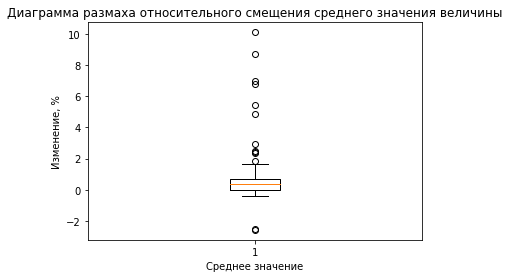

In [39]:
plt.boxplot(mean_shift)
plt.xlabel('Среднее значение')
plt.ylabel('Изменение, %')
plt.title('Диаграмма размаха относительного смещения среднего значения величины')
plt.show()

Посмотрим, какие признаки изменились больше всего:

In [40]:
mean_shift.loc[mean_shift > 1.75].sort_values(ascending=False)

secondary_cleaner.output.tail_sol         10.096022
rougher.input.floatbank11_xanthate         8.714465
primary_cleaner.input.sulfate              6.938362
primary_cleaner.input.depressant           6.780179
rougher.input.floatbank10_sulfate          5.409705
primary_cleaner.input.xanthate             4.851750
rougher.input.floatbank11_sulfate          2.932158
rougher.output.recovery                    2.507993
rougher.input.feed_rate                    2.449124
primary_cleaner.output.concentrate_sol     2.339018
rougher.input.floatbank10_xanthate         1.839951
dtype: float64

In [41]:
mean_shift.loc[mean_shift < -1]

rougher.input.feed_size   -2.577102
rougher.output.tail_au    -2.527705
dtype: float64

В среднем изменения среднего составили 0.84% с медианой 0.35%. Будем считать такие показатели допустимыми.

Посмотрим на корреляцию между признаками и целевыми признаками в тренировочной выборке:

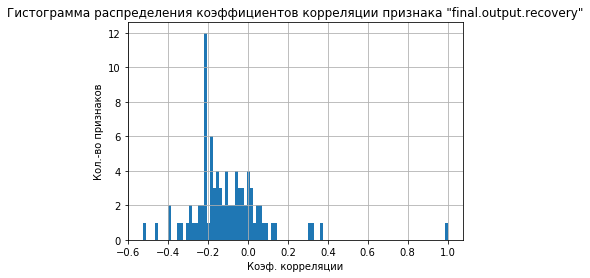

In [42]:
data_train.corr()['final.output.recovery'].hist(bins=100)
plt.xlabel('Коэф. корреляции')
plt.ylabel('Кол.-во признаков')
plt.title('Гистограмма распределения коэффициентов корреляции признака "final.output.recovery"')
plt.show()

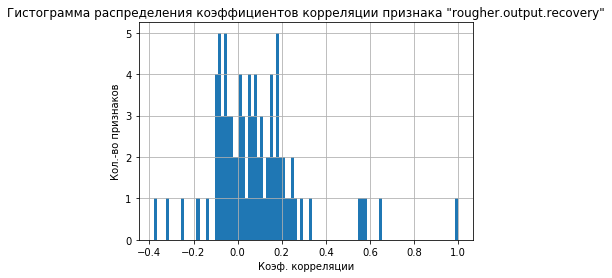

In [43]:
data_train.corr()['rougher.output.recovery'].hist(bins=100)
plt.xlabel('Коэф. корреляции')
plt.ylabel('Кол.-во признаков')
plt.title('Гистограмма распределения коэффициентов корреляции признака "rougher.output.recovery"')
plt.show()

Сильная связь, которая может повлиять на обучение модели, на гистограмме корреляции отсутствует.

### Вывод

На данном этапе были загружены 3 исходных файла с данными с тренировочной, тестовой выборками, а также файл с полным набором данных. Файлы организованы двумя типами данных: object, float64. Тренировочный и полный файлы имеют 87 колонок, 16860 и 22716 записей соответственно. Тестовый файл имеет 53 колонки и 5856 записей. Данные в выборках изменяются в широких пределах и имеют много выбросов, также имеются  пропуски и множество нулевых значений. 

На данном этапе был проверен расчет эффективности обогащения rougher.output.recovery. Полученное значение MAE 8.0 * 10^-15 говорит о том, что обогащение рассчитано верно. 

Были изучены отсутствующие в тестовой выборке признаки - таковых всего 34. Данные признаки, вероятно, не могут быть рассчитаны непосредственно во время технологического процесса и недоступны в режиме реального времени.

Была проведена предобработка данных: временные записи преобразованы в тип datetime, пропуски заполнены последним актуальным значением методом 'ffill', была рассмотрена корреляция целевых признаков - сильных связей, способных ухудшить качество обучения модели, не найдено.

# 2. Анализ данных <a id="step_2"></a>

### 2.1 Изменение концентрации металлов <a id="step_2_1"></a>

Посмотрим, как изменяется концентрация Au, Ag, Pb на различных этапах очистки.

- Au

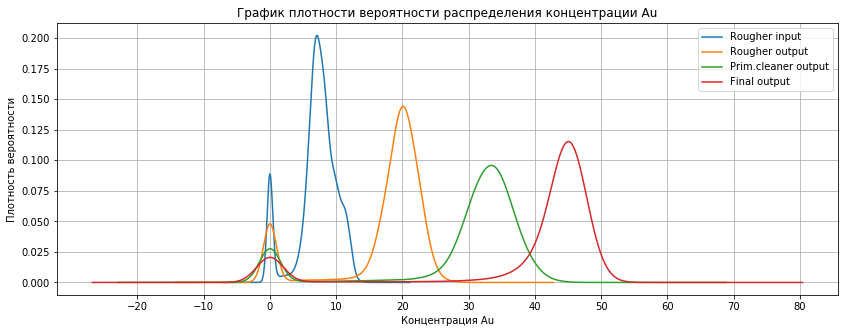

In [44]:
xticks=np.arange(-20,81,10)
ax = data_train_proc['rougher.input.feed_au'].plot(figsize=(14,5), kind='kde', label='Rougher input', grid=True, xticks=xticks)
data_train_proc['rougher.output.concentrate_au'].plot(figsize=(14,5), kind='kde', label='Rougher output', grid=True)
data_train_proc['primary_cleaner.output.concentrate_au'].plot(
                                                            figsize=(14,5), kind='kde', label='Prim.cleaner output', grid=True)
data_train_proc['final.output.concentrate_au'].plot(figsize=(14,5), kind='kde', label='Final output', grid=True)
ax.legend()
plt.xlabel('Концентрация Au')
plt.ylabel('Плотность вероятности')
plt.title('График плотности вероятности распределения концентрации Au')
plt.show()

Медианы концетрации Au на различных этапах:

In [45]:
print('Median rougher.output.concentrate_au: {:.1f}'.format(data_train_proc['rougher.input.feed_au'].median()))
print('Median rougher.output.concentrate_au: {:.1f}'.format(data_train_proc['rougher.output.concentrate_au'].median()))
print('Median primary_cleaner.output.concentrate_au: {:.1f}'.format(
                                                            data_train_proc['primary_cleaner.output.concentrate_au'].median()))
print('Median final.output.concentrate_au: {:.1f}'.format(data_train_proc['final.output.concentrate_au'].median()))

Median rougher.output.concentrate_au: 7.4
Median rougher.output.concentrate_au: 19.6
Median primary_cleaner.output.concentrate_au: 32.6
Median final.output.concentrate_au: 44.5


Концентрация золота увеличивается по мере обогащения на каждом этапе и достигает медианных значений от 7.4 на входе технологического процесса до 44.5 на выходе. В распределении много нулевых значений концентрации, что может быть связано особенностями технологического процесса.

- Ag

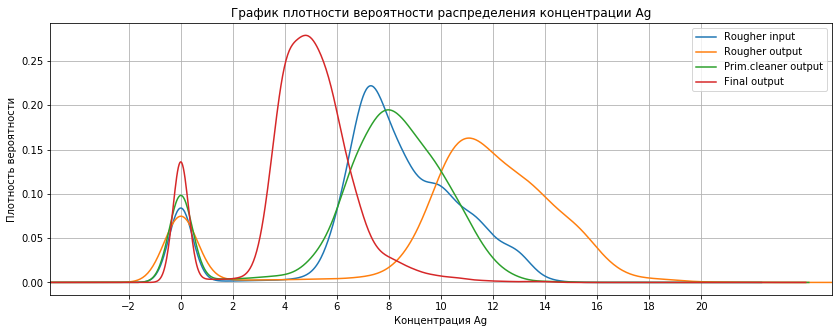

In [46]:
xticks=np.arange(-2,21,2)
ax = data_train_proc['rougher.input.feed_ag'].plot(figsize=(14,5), kind='kde', label='Rougher input', grid=True, xticks=xticks)
data_train_proc['rougher.output.concentrate_ag'].plot(figsize=(14,5), kind='kde', label='Rougher output', grid=True)
data_train_proc['primary_cleaner.output.concentrate_ag'].plot(
                                                         figsize=(14,5), kind='kde', label='Prim.cleaner output', grid=True)
data_train_proc['final.output.concentrate_ag'].plot(figsize=(14,5), kind='kde', label='Final output', grid=True)
ax.legend()
plt.xlabel('Концентрация Ag')
plt.xlim(-5,25)
plt.ylabel('Плотность вероятности')
plt.title('График плотности вероятности распределения концентрации Ag')
plt.show()

In [47]:
print('Median rougher.output.concentrate_ag: {:.1f}'.format(data_train_proc['rougher.input.feed_ag'].median()))
print('Median rougher.output.concentrate_ag: {:.1f}'.format(data_train_proc['rougher.output.concentrate_ag'].median()))
print('Median primary_cleaner.output.concentrate_ag: {:.1f}'.format(
                                                    data_train_proc['primary_cleaner.output.concentrate_ag'].median()))
print('Median final.output.concentrate_ag: {:.1f}'.format(data_train_proc['final.output.concentrate_ag'].median()))

Median rougher.output.concentrate_ag: 7.9
Median rougher.output.concentrate_ag: 11.4
Median primary_cleaner.output.concentrate_ag: 8.0
Median final.output.concentrate_ag: 4.9


Концентрация серебра увеличивается на этапе флотации от медианного значения концентрации на входе 7.9 до 11.4. Затем после двух этапов очистки снижается до 8 и 4.9 соответственно. Вероятно, в представленном технологическом процессе не ставится задача обогащения попутного серебра.

- Pb

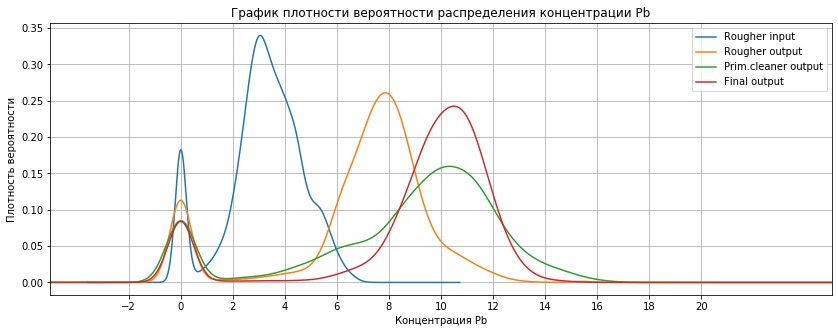

In [48]:
xticks=np.arange(-2,21,2)
ax = data_train_proc['rougher.input.feed_pb'].plot(figsize=(14,5), kind='kde', label='Rougher input', grid=True, xticks=xticks)
data_train_proc['rougher.output.concentrate_pb'].plot(figsize=(14,5), kind='kde', label='Rougher output', grid=True)
data_train_proc['primary_cleaner.output.concentrate_pb'].plot(
                                                    figsize=(14,5), kind='kde', label='Prim.cleaner output', grid=True)
data_train_proc['final.output.concentrate_pb'].plot(figsize=(14,5), kind='kde', label='Final output', grid=True)
ax.legend()
plt.xlabel('Концентрация Pb')
plt.xlim(-5,25)
plt.ylabel('Плотность вероятности')
plt.title('График плотности вероятности распределения концентрации Pb')
plt.show()

In [49]:
print('Median rougher.output.concentrate_pb: {:.1f}'.format(data_train_proc['rougher.input.feed_pb'].median()))
print('Median rougher.output.concentrate_pb: {:.1f}'.format(data_train_proc['rougher.output.concentrate_pb'].median()))
print('Median primary_cleaner.output.concentrate_pb: {:.1f}'.format(
                                                    data_train_proc['primary_cleaner.output.concentrate_pb'].median()))
print('Median final.output.concentrate_pb: {:.1f}'.format(data_train_proc['final.output.concentrate_pb'].median()))

Median rougher.output.concentrate_pb: 3.3
Median rougher.output.concentrate_pb: 7.6
Median primary_cleaner.output.concentrate_pb: 9.6
Median final.output.concentrate_pb: 10.1


In [50]:
print('Standard deviation primary_cleaner.output.concentrate_pb: {:.2f}'.format(
                                                            data_train_proc['primary_cleaner.output.concentrate_pb'].std()))
print('Standard deviation final.output.concentrate_pb: {:.2f}'.format(data_train_proc['final.output.concentrate_pb'].std()))

Standard deviation primary_cleaner.output.concentrate_pb: 3.91
Standard deviation final.output.concentrate_pb: 3.43


Концентрация свинца увеличивается от медианного значения от 3.3 на входе перед этапом флотации до 7.6 на выходе. Затем на первом этапе очистки медиана увеличивается  до 9.6 и на втором этапе незначительно увеличивается до 10.1, при этом стандартное отклонение концентрации снижается от 3.9 на первом этапе до 3.4 на втором.

### 2.2 Распределение размеров гранул сырья <a id="step_2_2"></a>

Посмотрим на распределения гранул сырья на обучающей и тестовой выборках.

- Размер гранул на этапе флотации

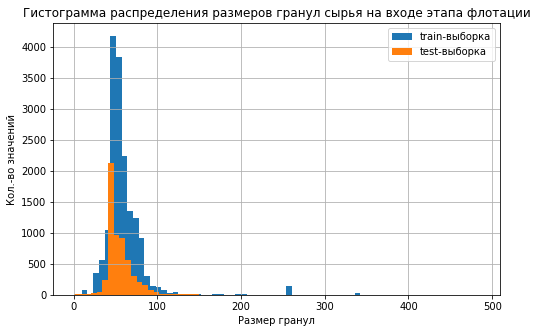

In [51]:
ax = data_train_proc['rougher.input.feed_size'].plot(figsize=(8,5), kind='hist', label='train-выборка', grid=True, bins=70)
data_test_proc['rougher.input.feed_size'].plot(kind='hist', label='test-выборка', grid=True, bins=70)
ax.legend()
plt.xlabel('Размер гранул')
plt.ylabel('Кол.-во значений')
plt.title('Гистограмма распределения размеров гранул сырья на входе этапа флотации')
plt.show()

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


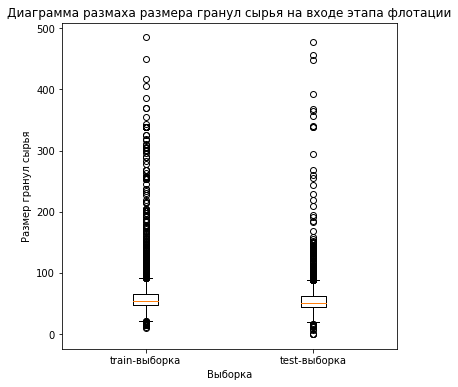

In [52]:
plt.subplots(figsize=(6, 6))
plt.boxplot([
     data_train_proc['rougher.input.feed_size'], 
     data_test_proc['rougher.input.feed_size']], labels=['train-выборка', 'test-выборка'])
plt.xlabel('Выборка')
plt.ylabel('Размер гранул сырья')
plt.title('Диаграмма размаха размера гранул сырья на входе этапа флотации')
plt.show()

In [53]:
data_train_proc['rougher.input.feed_size'].describe()

count    16860.000000
mean        60.188595
std         30.522242
min          9.659576
25%         47.548897
50%         54.066003
75%         65.397249
max        484.967466
Name: rougher.input.feed_size, dtype: float64

In [54]:
data_test_proc['rougher.input.feed_size'].describe()

count    5856.000000
mean       55.898866
std        22.707969
min         0.046369
25%        43.852884
50%        49.964796
75%        61.628003
max       477.445473
Name: rougher.input.feed_size, dtype: float64

На входе этапа флотации размер гранул сырья изменяется в широких пределах, обучающая и тестовая выборки имеют много выбросов. Несмотря на это, график распределений достаточно похожий у обеих выборок.

- Размер гранул на этапе очистки

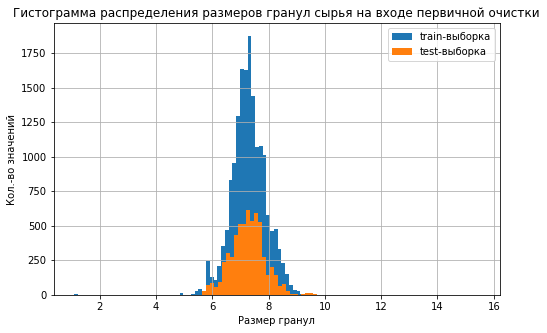

In [55]:
ax = data_train_proc['primary_cleaner.input.feed_size'].plot(
                                                        figsize=(8,5), kind='hist', label='train-выборка', grid=True, bins=70)
data_test_proc['primary_cleaner.input.feed_size'].plot(kind='hist', label='test-выборка', grid=True, bins=70)
ax.legend()
plt.xlabel('Размер гранул')
#plt.xlim(4,10)
plt.ylabel('Кол.-во значений')
plt.title('Гистограмма распределения размеров гранул сырья на входе первичной очистки')
plt.show()

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


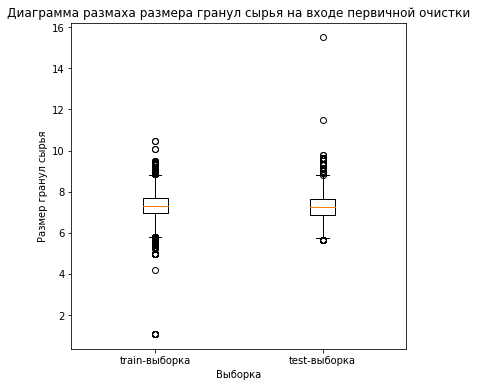

In [56]:
plt.subplots(figsize=(6, 6))
plt.boxplot([
     data_train_proc['primary_cleaner.input.feed_size'], 
     data_test_proc['primary_cleaner.input.feed_size']], labels=['train-выборка', 'test-выборка'])
plt.xlabel('Выборка')
plt.ylabel('Размер гранул сырья')
plt.title('Диаграмма размаха размера гранул сырья на входе первичной очистки')
plt.show()

In [57]:
data_train_proc['primary_cleaner.input.feed_size'].describe()

count    16860.000000
mean         7.297285
std          0.619166
min          1.080000
25%          6.940000
50%          7.285000
75%          7.700000
max         10.470000
Name: primary_cleaner.input.feed_size, dtype: float64

In [58]:
data_test_proc['primary_cleaner.input.feed_size'].describe()

count    5856.000000
mean        7.264651
std         0.611526
min         5.650000
25%         6.885625
50%         7.259333
75%         7.650000
max        15.500000
Name: primary_cleaner.input.feed_size, dtype: float64

На входе первого этапа очистки разброс значений гораздо меньше, чем на этапе флотации. Графики распределения размеров на обучающей и тестовой выборках схожие.

### 2.3 Исследование суммарной концентрации веществ на разных стадиях <a id="step_2_3"></a>

In [59]:
rougher_input_train_sum = data_train_proc['rougher.input.feed_ag']  \
                        + data_train_proc['rougher.input.feed_pb']  \
                        + data_train_proc['rougher.input.feed_sol'] \
                        + data_train_proc['rougher.input.feed_au']

In [60]:
rougher_input_test_sum = data_test_proc['rougher.input.feed_ag']  \
                       + data_test_proc['rougher.input.feed_pb']  \
                       + data_test_proc['rougher.input.feed_sol'] \
                       + data_test_proc['rougher.input.feed_au']

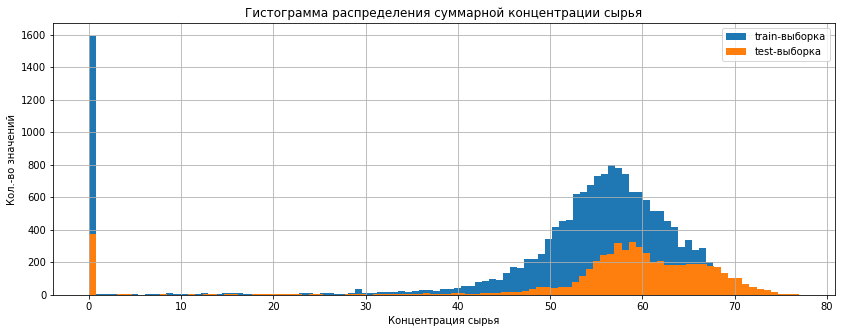

In [61]:
#xticks=np.arange(-20,81,10)
ax = rougher_input_train_sum.plot(figsize=(14,5), kind='hist', label='train-выборка', grid=True, bins=100)
rougher_input_test_sum.plot(figsize=(14,5), kind='hist', label='test-выборка', grid=True, bins=100)
ax.legend()
plt.xlabel('Концентрация сырья')
plt.ylabel('Кол.-во значений')
plt.title('Гистограмма распределения суммарной концентрации сырья')
plt.show()

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


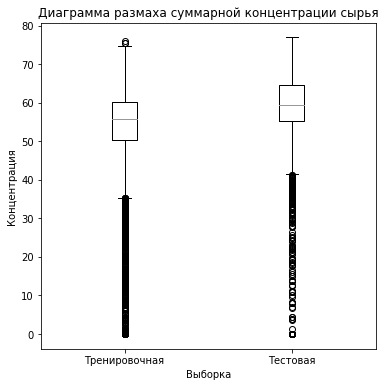

In [62]:
plt.subplots(figsize=(6, 6))
plt.boxplot([
     rougher_input_train_sum, 
     rougher_input_test_sum], labels=['Тренировочная', 'Тестовая'])
plt.xlabel('Выборка')
plt.ylabel('Концентрация')
plt.title('Диаграмма размаха суммарной концентрации сырья')
plt.show()

Возможно, нулевые значения концентраци могут появляться при определенном статусе технологического процесса (например, останов), либо быть ошибкой измерительного оборудования. Уберем значения с суммарной концентрацией менее 1 из обучающей и тестовой выборки.

In [63]:
data_train_proc = data_train_proc.loc[rougher_input_train_sum >= 1]   

In [64]:
data_test_proc = data_test_proc.loc[rougher_input_test_sum >= 1]     

### Вывод

На данном этапе было проанализировано изменение концентрации металлов Au, Ag, Pb на этапах флотации и очистки. Медианная концентрация Au возрастает от 7.4 до 19.6 в результате флотации, составляет 32.6 на выходе первичной очистки и 44.5 после финальной очистки. Медиана концентрации Ag возрастает в результате флотации от 7.9 до 11.4, затем уменьшается на первом и втором этапах очистки до 8 и 4.9 соответственно. Медианная концентрация Pb увеличивается от 3.3 до 7.6 на этапе флотации, затем незначительно возрастает до 9.6 и 10.1 на первом и втором этапах очистки.

Был проанализирован размер гранул сырья на этапах флотации и очистки. Данные распределения схожи и могут быть использованы для обучения модели.

Был произведен анализ суммарной концентрации Au, Ag, Pb, Sol в тренировочной и тестовой выборках, в результате чего было обнаружено большое кол.-во нулевых значений. Значения с суммарной концентрацией менее 1 удалены из тренировочной и тестовой выборок, что уменьшило их размер на 9% и 6% соответственно.

# 3. Создание модели <a id="step_3"></a>

### 3.1 Вычисление sMAPE <a id="step_3_1"></a>

Создадим функцию для расчета итогового sMAPE:

In [65]:
def smape_calc(target, predictions):
    
    predict_rougher = np.array(predictions)[:,0] #предсказания для флотации
    predict_final = np.array(predictions)[:,1]   #предсказания для финальной очистки
    
    target_rougher = (target['rougher.output.recovery'].reset_index(drop=True)) #целевые признаки для флотации
    target_final = (target['final.output.recovery'].reset_index(drop=True)) #целевые признаки для финальной очистки
        
    smape_rougher = np.sum(np.abs(target_rougher - predict_rougher) / # smape этапа флотации
                    ((np.abs(target_rougher) + np.abs(predict_rougher)) / 2)) * 100 / len(target_rougher)
    
    smape_final = np.sum(np.abs(target_final - predict_final) / # smape этапа очистки
                    ((np.abs(target_final) + np.abs(predict_final)) / 2)) * 100 / len(target_final)

    smape = 0.25 * smape_rougher + 0.75 * smape_final # итоговое smape 

    return smape

Функцию в дальнейшем будем использовать в качестве целевой функции потерь при поиске оптимальных гиперпараметров и при расчете метрики на тестовой выборке.

### 3.2 Обучение и тестирование моделей <a id="step_3_2"></a>

Подготовим тренировочную и тестовую выборку для создания модели.

1) удаляем в тренировочных данных признаки, отсутствующие в тестовой выборке:

In [66]:
test_columns_absent = test_columns_absent.loc[
    (test_columns_absent !='final.output.recovery') & 
    (test_columns_absent !='rougher.output.recovery')]

In [67]:
data_train_proc = data_train_proc.drop(test_columns_absent, axis=1)

2) добавляем в тренировочный датасет целевые признаки rougher.output.recovery, final.output.recovery из полного набора данных:

In [68]:
data_test_proc = pd.merge(data_test_proc, data_full_proc.loc[:,[
                                                                 'rougher.output.recovery',
                                                                 'final.output.recovery', 
                                                                 'date']], 
                                                                  how='left', on='date')

3) удаляем из обучающего и тестового датасета столбец с датами, т.к. они не нужны для работы модели:

In [69]:
data_train_proc = data_train_proc.drop('date', axis=1)

In [70]:
data_test_proc = data_test_proc.drop('date', axis=1)

4) Подготовим переменные с признаками и целевыми признаками:

In [71]:
#тренировочные признаки
features = data_train_proc.drop(['rougher.output.recovery','final.output.recovery'], axis=1).reset_index(drop=True)

In [72]:
#целевые признаки для тренировочной выборки
target = data_train_proc.loc[:,['rougher.output.recovery','final.output.recovery']].reset_index(drop=True)

In [73]:
#тестовые признаки
features_test = data_test_proc.drop(['rougher.output.recovery','final.output.recovery'], axis=1)

In [74]:
#целевые признаки для тестовой выборки
target_test = data_test_proc.loc[:,['rougher.output.recovery','final.output.recovery']]

5) Проведем настройку масштабирования на тренировочной выборке и применим масштабирование для обеих выборок:

In [75]:
scaler = StandardScaler()

In [76]:
scaler.fit(features)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [77]:
features = scaler.transform(features)

In [78]:
features_test = scaler.transform(features_test)

6) Создаем scorer на основе метрики smape и функции smape_calc:

In [79]:
my_scorer = make_scorer(smape_calc, greater_is_better=False)

7) Создаем и обучаем модель, получаем предсказания:

- Модель решающего дерева

In [80]:
model_decision_tree = DecisionTreeRegressor(random_state=12345)

In [81]:
decision_tree_param = {'max_depth': range(2,6), 
                       'max_leaf_nodes': range(2,5),
                       'max_features': [15,23,35,52]
                      }

In [82]:
grid_decision_tree = GridSearchCV(model_decision_tree, decision_tree_param, cv=3, scoring=my_scorer)

In [83]:
%%time
grid_decision_tree.fit(features, target)

CPU times: user 15.3 s, sys: 0 ns, total: 15.3 s
Wall time: 15.5 s


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=12345,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': range(2, 6),
                         'max_features': [15, 23, 35, 52],
                         'max_leaf_nodes': range(2, 5)},
             pre_dispatch='2*n_jobs', refit=

In [84]:
print('sMAPE: {:.3f}'.format(abs(grid_decision_tree.best_score_)))
print('Best params: ', grid_decision_tree.best_params_)

sMAPE: 12.801
Best params:  {'max_depth': 3, 'max_features': 23, 'max_leaf_nodes': 4}


- Модель случайного леса

In [85]:
model_random_forest = RandomForestRegressor(random_state=12345)

In [86]:
random_forest_param = {'n_estimators': range(4,11,2),
                       'max_depth': range(2,5,2),
                       'max_features': [15, 24, 35, 52]
                      }

In [87]:
grid_random_forest = GridSearchCV(model_random_forest, random_forest_param, cv=3, scoring=my_scorer)

In [88]:
%%time
grid_random_forest.fit(features, target)

CPU times: user 54 s, sys: 60.2 ms, total: 54 s
Wall time: 55 s


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False,
                                             random_state=12345, verbose=0,
                                             warm_start=False),
             iid='warn', n_jobs=None,
          

In [89]:
print('sMAPE: {:.3f}'.format(abs(grid_random_forest.best_score_)))
print('Best params: ', grid_random_forest.best_params_)

sMAPE: 12.228
Best params:  {'max_depth': 4, 'max_features': 15, 'n_estimators': 8}


- Модель линейной регрессии

In [90]:
model_linear = LinearRegression()

In [91]:
grid_linear = GridSearchCV(model_linear, {}, cv=3, scoring=my_scorer)

In [92]:
%%time

grid_linear.fit(features, target)

Wall time: 156 ms


In [93]:
print('sMAPE: {:.3f}'.format(abs(grid_linear.best_score_)))

sMAPE: 17.691


Наименьшая метрика sMAPE получена при использовании модели случайного леса. Будем использовать данную модель при проверке на тестовых данных.

8) Проверяем модель случайного леса на тестовой выборке:

In [94]:
model_random_forest = RandomForestRegressor(random_state=12345, n_estimators=8, max_depth=4, max_features=15)

In [95]:
model_random_forest.fit(features, target)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
                      max_features=15, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=8, n_jobs=None,
                      oob_score=False, random_state=12345, verbose=0,
                      warm_start=False)

In [96]:
random_forest_predictions = model_random_forest.predict(features_test)

In [97]:
print('sMAPE модели на тестовой выборке: {:.3f}'.format(smape_calc(target_test, random_forest_predictions)))

sMAPE модели на тестовой выборке: 9.953


Проверим модель на адекватность. Создадим константную модель на основе медианы целевых признаков тестовой выборки и рассчитаем sMAPE на этих данных:

In [98]:
predictions_constant = target_test.copy()

In [99]:
predictions_constant['rougher.output.recovery'] = target_test['rougher.output.recovery'].median()

In [100]:
predictions_constant['final.output.recovery'] = target_test['final.output.recovery'].median()

In [101]:
predictions_constant.head()

,rougher.output.recovery,final.output.recovery
0,87.321876,69.69453
1,87.321876,69.69453
2,87.321876,69.69453
3,87.321876,69.69453
4,87.321876,69.69453


In [102]:
print('sMAPE константной модели: {:.3f}'.format(smape_calc(target_test, predictions_constant)))

sMAPE константной модели: 10.070


Значения метрики sMAPE константы и модели на имеющемся наборе данных примерно одинаковы - при заданных параметрах отличие составляет 1% в пользу модели случайного леса.

Посмотрим на графики распределения целевых признаков и предсказаний:

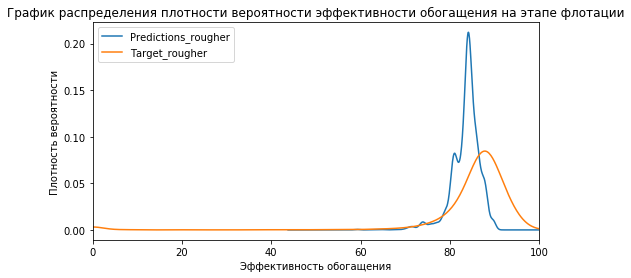

In [103]:
ax = pd.Series(random_forest_predictions[:,0]).plot(kind='kde',  label='Predictions_rougher', figsize=(8,4))
target_test.iloc[:,0].plot(kind='kde',  label='Target_rougher', ax=ax)
ax.legend()
plt.xlim(0,100)
plt.xlabel('Эффективность обогащения')
plt.ylabel('Плотность вероятности')
plt.title('График распределения плотности вероятности эффективности обогащения на этапе флотации')
plt.show()

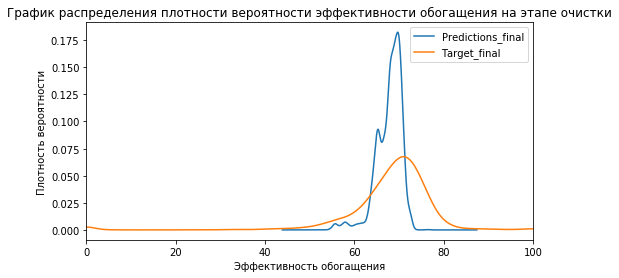

In [104]:
ax = pd.Series(random_forest_predictions[:,1]).plot(kind='kde', label='Predictions_final', figsize=(8,4))
target_test.iloc[:,1].plot(kind='kde', label='Target_final', ax=ax)
ax.legend()
plt.xlim(0,100)
plt.xlabel('Эффективность обогащения')
plt.ylabel('Плотность вероятности')
plt.title('График распределения плотности вероятности эффективности обогащения на этапе очистки')
plt.show()

Распределение предсказаний смещено влево относительно правильных ответов целевых признаков.

### Вывод

На данном этапе была создана функция для расчета метрики sMAPE. 

Были созданы модели дерева решений, случайного леса, линейной регрессии. Для поиска наилучших гиперпараметров был использован поиск по сетке GridSearch с кросс-валидацией и кол.-вом k-folds равным 3. Целевая метрика sMAPE для линейной регрессии составила 17.69, для дерева решений 12.8, для случайного леса 12.23. По наименьшему sMAPE была выбрана модель случайного леса с глубиной 4, макс. кол.-вом признаков 15, кол.-вом оценщиков 8. Данная модель была обучена на тестовых данных. Итоговое значение sMAPE на тестовых данных составило 9.95. Было проведено сравнение обученной и константной модели - при использованных параметрах отличие составило 1% в пользу модели случайного леса.

### Чек-лист <a id="checklist"></a>

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке выполнения
- [x]  Выполнен шаг 1: данные подготовлены
    - [x]  Проверена формула вычисления эффективности обогащения
    - [x]  Проанализированы признаки, недоступные в тестовой выборке
    - [x]  Проведена предобработка данных
- [x]  Выполнен шаг 2: данные проанализированы
    - [x]  Исследовано изменение концентрации элементов на каждом этапе
    - [x]  Проанализированы распределения размеров гранул на обучающей и тестовой выборках
    - [x]  Исследованы суммарные концентрации
    - [x]  Проанализированы и обработаны аномальные значения
- [x]  Выполнен шаг 3: построена модель прогнозирования
    - [x]  Написана функция для вычисления итогового *sMAPE*
    - [x]  Обучено и проверено несколько моделей
    - [x]  Выбрана лучшая модель, её качество проверено на тестовой выборке